## This section is meant to peruse the dataset of masking + training twice

#### And this is the original file of peruse dataset. I keep this file because when I would actually use AUG_TT, I can have some references. The new peruse_dataset file is not general, to actually get familiar with the dataset (waterbird, in this example).

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

sys.path.append("..")
from data import get_data
from data._api import _get_guidance_series



class FakeArgs:
    model = "resnet50"
    dataset = "celebA"
    method = "AUG_TT"
    root = "/scratch/ym2380/data/"
    train_fraction = 1.0
    grid_height = 7
    grid_width = 7
    mask_rate1 = 0.9
    mask_rate2 = 0
    test_mask_rate = 0 
    auto_fill = False
    fill_r = 1
    fill_g = 1
    fill_b = 1
    exp_name = "11290711_3"
    conditional_epoch = 4


def visualize_dataset(dataset, num_images=64, cols=8, figsize=(36, 36)):
    plt.figure(figsize=figsize)
    rows = num_images // cols + int(num_images % cols > 0)

    for i in range(min(num_images, len(dataset))):
        image, _, _, _ = dataset[i]
        plt.subplot(rows, cols, i + 1)
        if torch.is_tensor(image):
            image = image.numpy().transpose((1, 2, 0))
        plt.imshow(image)
        #plt.axis('off')

    plt.tight_layout()
    plt.show()
    
def visualize_specific_indices(dataset, indices, cols=5, figsize=(15, 3)):

    if len(indices) == 0:
        print("No indices provided")
        return

    plt.figure(figsize=figsize)
    rows = len(indices) // cols + int(len(indices) % cols > 0)

    for i, idx in enumerate(indices):
        image, _, _, _ = dataset[idx]
        plt.subplot(rows, cols, i + 1)
        if torch.is_tensor(image):
            image = image.permute(1, 2, 0).numpy()
        plt.imshow(image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [2]:
args = FakeArgs()
data = get_data(args, 'train')

transform1:
 Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0), ratio=(1.0, 1.3333), interpolation=bilinear, antialias=warn)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
transform2:
 Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0), ratio=(1.0, 1.3333), interpolation=bilinear, antialias=warn)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [3]:
s = _get_guidance_series(args)
indices = s[s].index
print(indices)

Index([    12,     27,     99,    109,    132,    151,    166,    222,    250,
          251,
       ...
       162600, 162605, 162649, 162652, 162670, 162689, 162724, 162727, 162729,
       162750],
      dtype='int64', length=8750)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

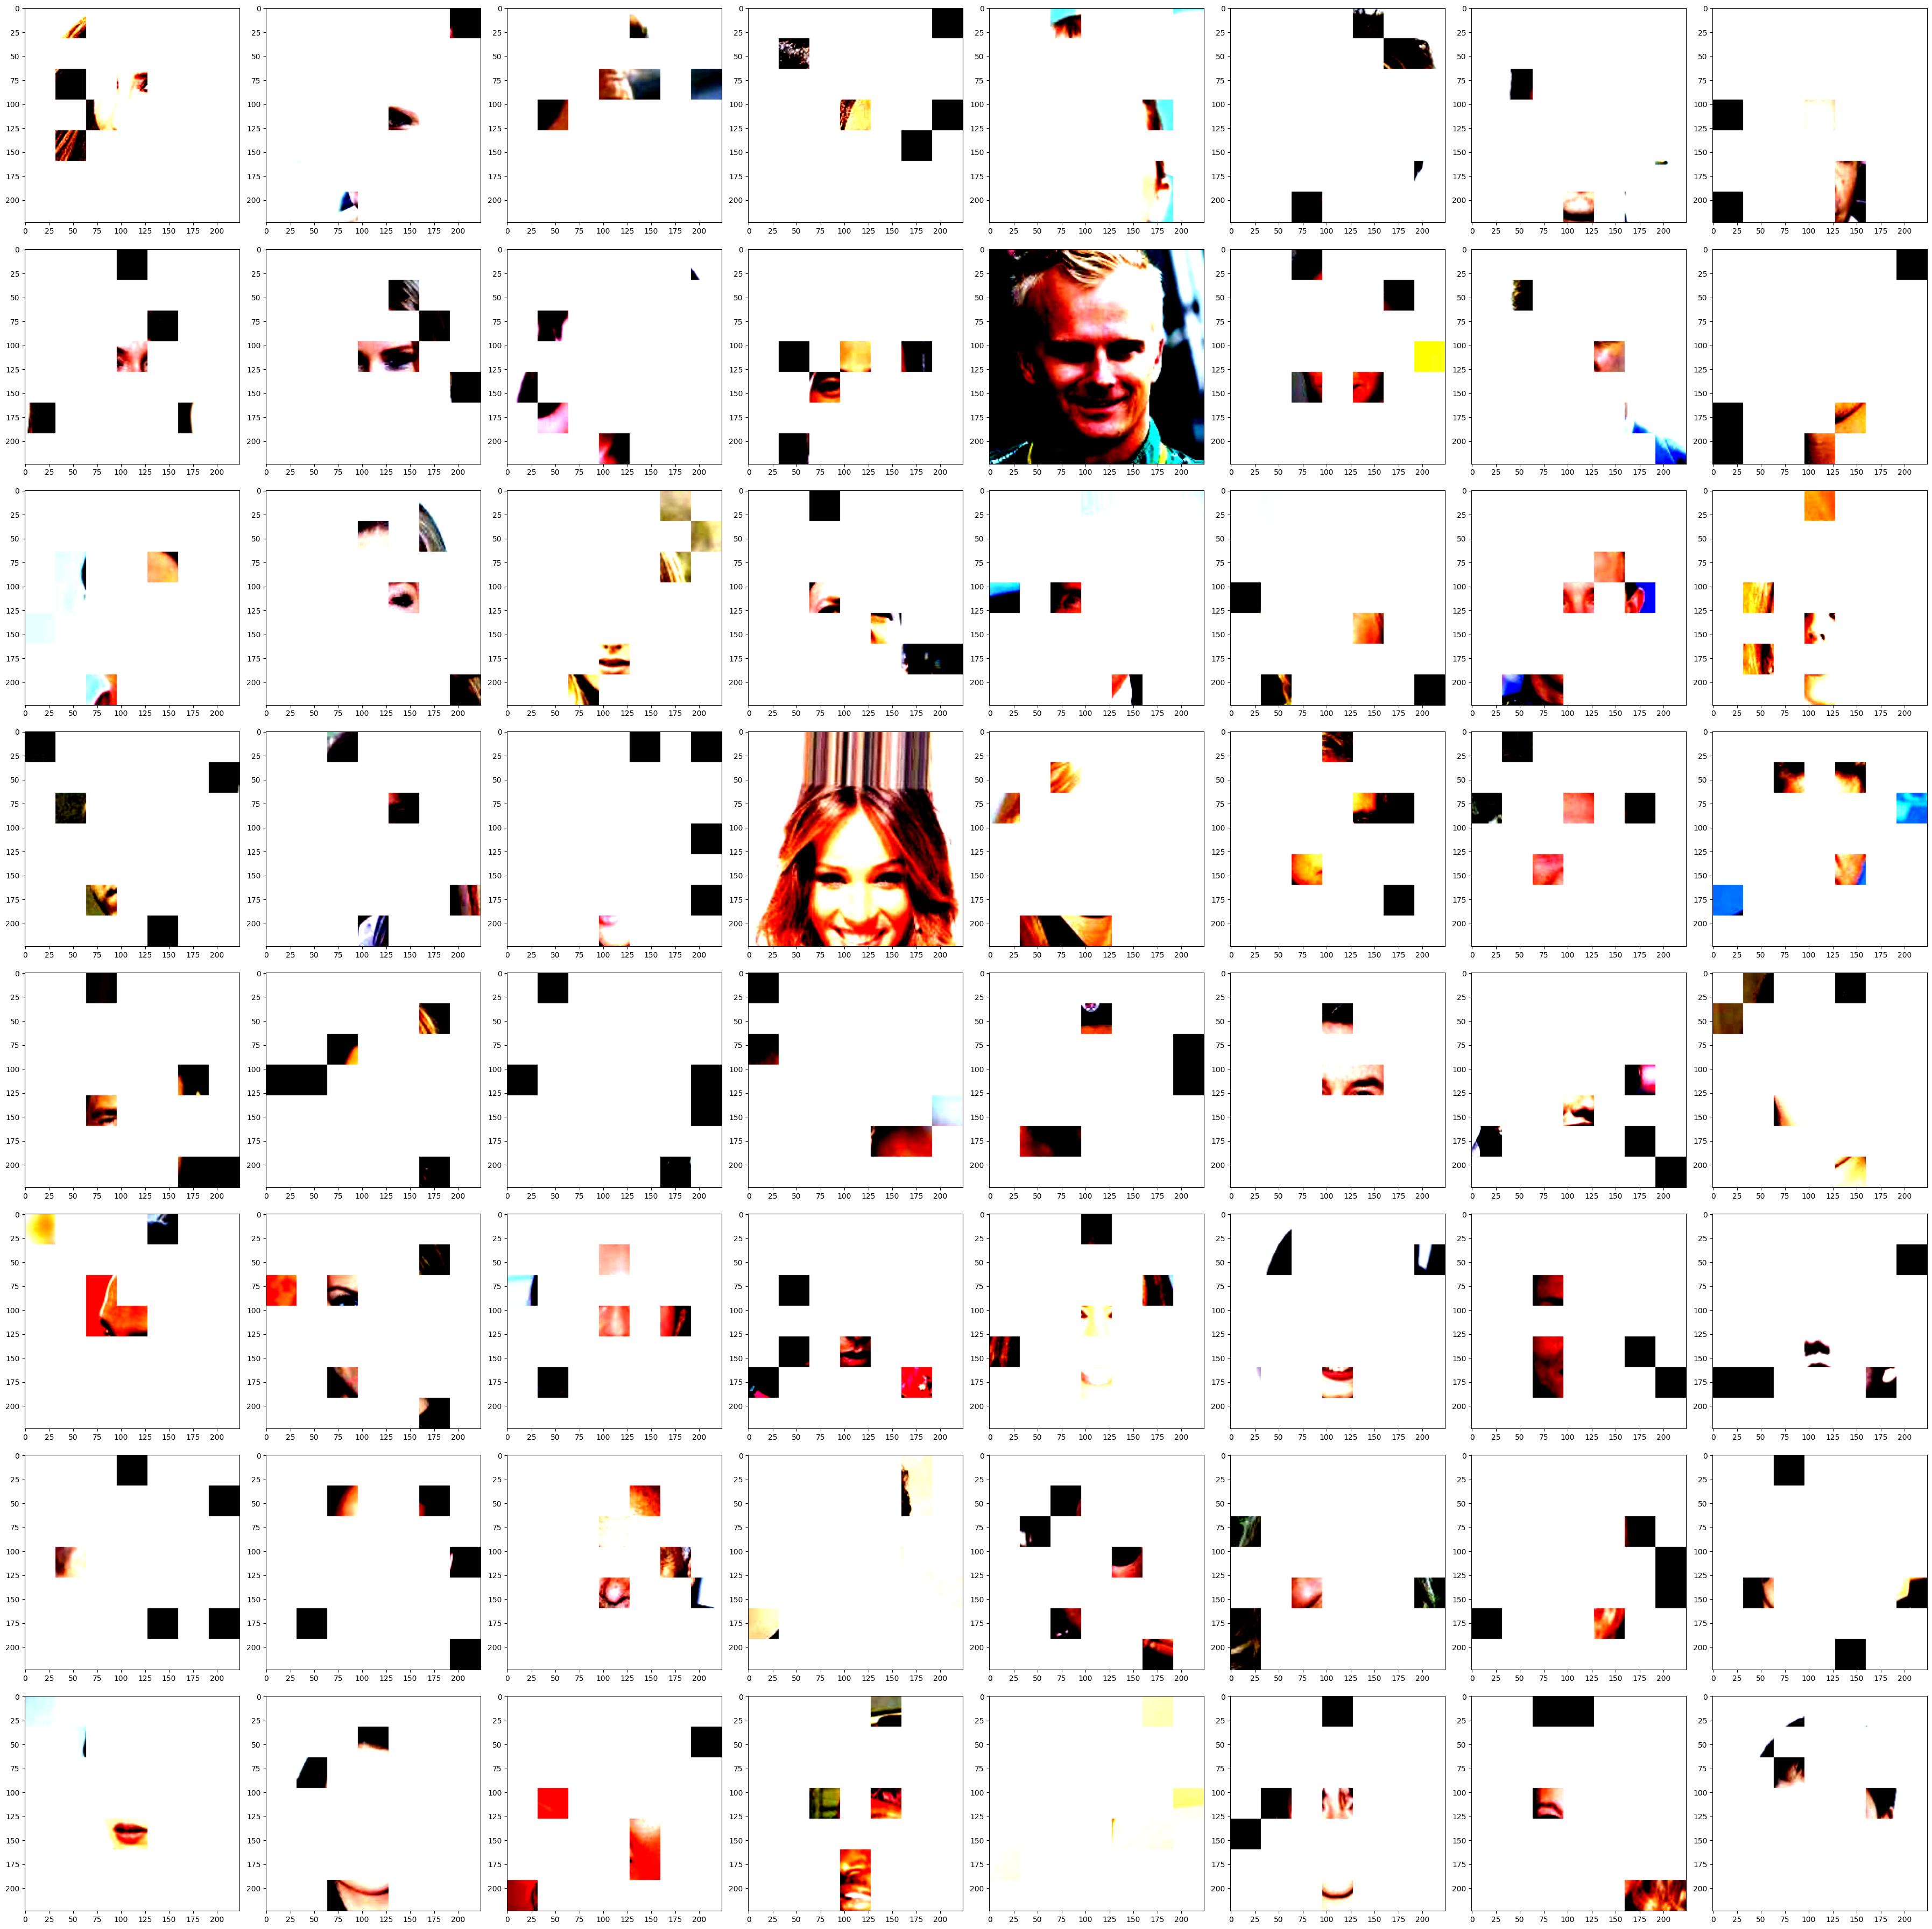

In [4]:
visualize_dataset(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


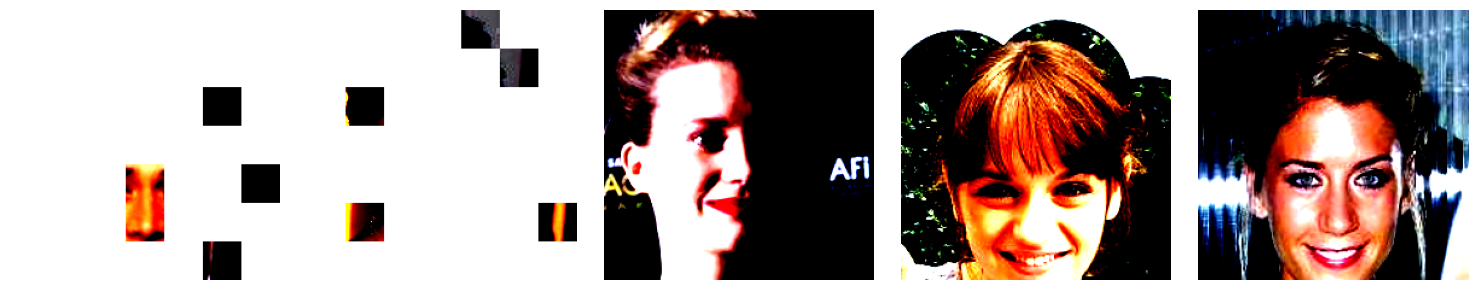

In [5]:
visualize_specific_indices(data, [11,     13,     99,    109,    132])